### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Which season is best for promotion and advertisement of Airbnb?

### Reading Calendar Dataset

In [3]:
cal_df = pd.read_csv('./dataset/calendar.csv')
cal_df.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,164087,2019-03-11,t,$75.00,$75.00,1,25
1,2078,2019-03-11,f,$38.00,$38.00,2,7
2,2078,2019-03-12,f,$38.00,$38.00,2,7
3,2078,2019-03-13,f,$38.00,$38.00,2,7
4,2078,2019-03-14,f,$38.00,$38.00,2,7
5,2078,2019-03-15,f,$38.00,$38.00,2,7
6,2078,2019-03-16,f,$38.00,$38.00,2,7
7,2078,2019-03-17,f,$38.00,$38.00,2,7
8,2078,2019-03-18,f,$38.00,$38.00,2,7
9,2078,2019-03-19,f,$38.00,$38.00,2,7


### Number of attributes in the dataframe

In [4]:
list(cal_df.columns)

['listing_id',
 'date',
 'available',
 'price',
 'adjusted_price',
 'minimum_nights',
 'maximum_nights']

### Determining the sample size

In [5]:
cal_df['date'].min()

'2019-03-11'

In [6]:
cal_df['date'].max()

'2020-03-09'

### Checking any null values in the dataframe

In [7]:
cal_df.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [8]:
# changing the datatype of date attribute
cal_df['date'] = pd.to_datetime(cal_df['date'])

season = cal_df[cal_df['available']=='f']
season = season.groupby('date')['listing_id'].count().reset_index()
season['month'] = season['date'].dt.strftime('%b')
season['day'] = season['date'].dt.day

season.head(10)

,date,listing_id,month,day
0,2019-03-11,17039,Mar,11
1,2019-03-12,15762,Mar,12
2,2019-03-13,15154,Mar,13
3,2019-03-14,14894,Mar,14
4,2019-03-15,15012,Mar,15
5,2019-03-16,14876,Mar,16
6,2019-03-17,13788,Mar,17
7,2019-03-18,13381,Mar,18
8,2019-03-19,13360,Mar,19
9,2019-03-20,13390,Mar,20


### Plotting the whole season

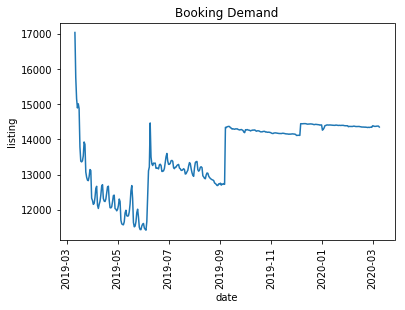

In [9]:
plt.plot(season['date'], season['listing_id'])
plt.title('Booking Demand')
plt.xlabel('date')
plt.xticks(rotation='vertical')
plt.ylabel('listing');

From above plot, I can conclude that the season becomes low around late '2019-04' to late '2019-06' and then around early '2019-07 to late '2019-09'. I can't tell about the latter part as I don't know whether this is saturated value or not. I need more data to conclude that thing.

### Dividing seasons based on dips
Based on the above plot, I divided the whole season into 3 sub season based the the dips in the demand

In [10]:
season['weekday'] = season['date'].dt.weekday_name

sub_season_1 = season[(season['date']>='2019-03-11')& \
                      (season['date']<='2019-06-08')]
sub_season_2 = season[(season['date']>='2019-06-09')& \
                      (season['date']<='2019-09-06')]
sub_season_3 = season[(season['date']>='2019-09-07')& \
                      (season['date']<='2020-03-09')]

### Boxplot for each cluster

#### Sub-Season I

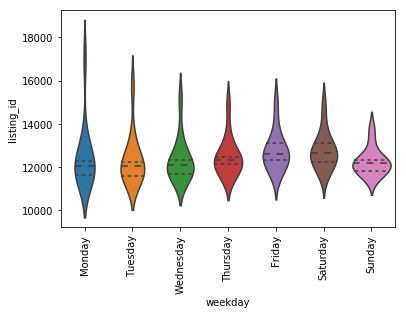

In [11]:
sns.violinplot(x='weekday', y='listing_id', data=sub_season_1, inner = 'quartile')
plt.xticks(rotation='vertical')
plt.show()

#### Sub-Season II

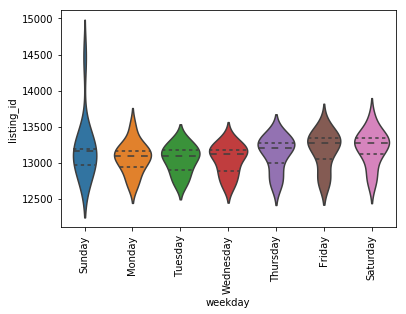

In [12]:
sns.violinplot(x='weekday', y='listing_id', data=sub_season_2, inner = 'quartile')
plt.xticks(rotation='vertical')
plt.show()

#### Sub-Season III

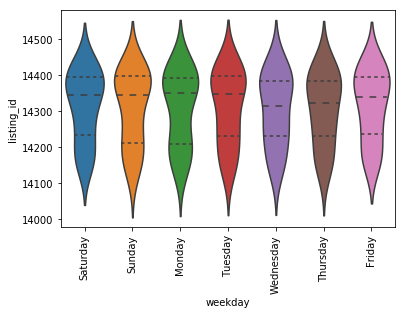

In [13]:
sns.violinplot(x='weekday', y='listing_id', data=sub_season_3, inner = 'quartile')
plt.xticks(rotation='vertical')
plt.show()

In season I, we can see that the demand for bookings is low for ['Monday', 'Tuesday', 'Wednesday', 'Sunday']. In season II, the demand is low for ['Monday', 'Tuesday', 'Wednesday', 'Sunday']. In season III, it is low for ['Wednesday', 'Thursday'].

Overall, we need to focus on advertisements and promotions during the period of "2019-04" to "2019-09". During this period, we will target the audience only on ['Monday', 'Tuesday', 'Wednesday', 'Sunday'].

### Which Montreal area has best rooms available?

### Reading dataset

In [14]:
list_df = pd.read_csv('./dataset/listings.csv')
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20190311061246,2019-03-11,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Centrally located clean comfy furnished room ...,Centrally located in trendy Le Plateau. Join...,none,Although my place is centrally located in Le P...,...,t,f,flexible,f,f,1,0,1,0,2.68
1,2843,https://www.airbnb.com/rooms/2843,20190311061246,2019-03-11,Fabulous downtown room,Come stay in this trendy area of downtown Mont...,"Private individual room, double bed, desk, goo...",Come stay in this trendy area of downtown Mont...,none,This area of St Henri is actually downtown Mon...,...,t,f,moderate,f,f,6,3,3,0,0.96
2,14584,https://www.airbnb.com/rooms/14584,20190311061246,2019-03-11,"Spread Out in 1,200 Square Feet of Luxury in t...",This stylish and spacious loft has modern artw...,It's artistic and tasteful with a modern touch...,This stylish and spacious loft has modern artw...,none,This chic apartment can be found in the Platea...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.50
3,29059,https://www.airbnb.com/rooms/29059,20190311061246,2019-03-11,Lovely studio Quartier Latin,"Lovely studio with 1 closed room, near everyth...","Lovely studio with 1 closed room, near everyth...","Lovely studio with 1 closed room, near everyth...",none,CENTRAL est le mot d'ordre : tout est proche. ...,...,f,f,moderate,f,f,2,2,0,0,2.57
4,29061,https://www.airbnb.com/rooms/29061,20190311061246,2019-03-11,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...,Lovely historic house with plenty of period ch...,Charmante maison au coeur du Quartier Latin et...,none,Le quartier que vous découvrirez se nomme le Q...,...,t,f,moderate,f,f,2,2,0,0,0.52


In [15]:
list(list_df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


From the above list, I think features like (host_is_superhost, zipcode, reviews_per_month) would be appropriate for finding out the insights related to best rooms.

### Checking null values

In [16]:
list_df[['host_is_superhost','zipcode', 'reviews_per_month']].isnull().sum()

host_is_superhost       1
zipcode               372
reviews_per_month    4275
dtype: int64

### Dropping null values

In [17]:
list_df = list_df.dropna(subset=['host_is_superhost','zipcode', 'reviews_per_month'], axis=0)

### Insights based on number of reviews

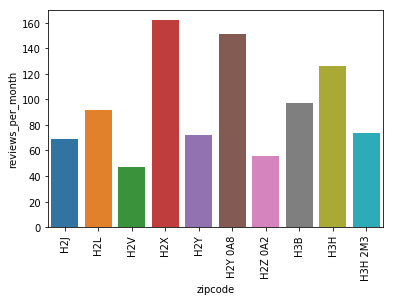

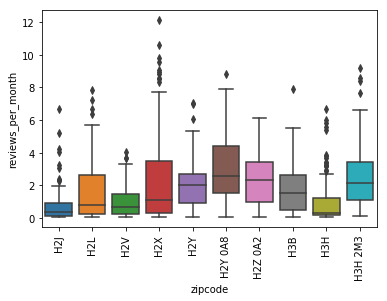

In [18]:
grouped_list_df = list_df.groupby('zipcode')['reviews_per_month'].count().sort_values(ascending=False).reset_index()
grouped_list_df = grouped_list_df.head(10)
grouped_list_df = grouped_list_df.sort_values(by=['zipcode'])

sns.barplot(data=grouped_list_df, x='zipcode', y='reviews_per_month')
plt.xticks(rotation='vertical')
plt.show()

sub_list_df = list_df.loc[list_df['zipcode'].isin(grouped_list_df['zipcode'])]
sub_list_df = sub_list_df.sort_values(by=['zipcode'])
sns.boxplot(data=sub_list_df, x='zipcode', y='reviews_per_month')
plt.xticks(rotation='vertical')
plt.show()

In this case, barplot will play a major role. We can conclude that 'H2X' has highest number of reviews according to both barplot and boxplot (most of the reviews is considered as outliers but it useful). 'H2Y 0A8' comes at second place and 'H3H' comes at third place for best rooms based on numbers of reviews. 

### Insights based on total number of reviewed scores

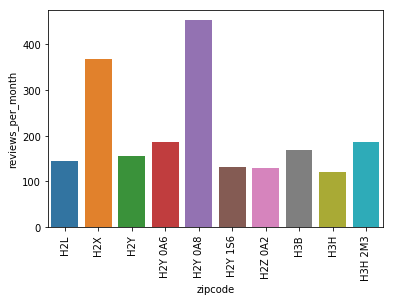

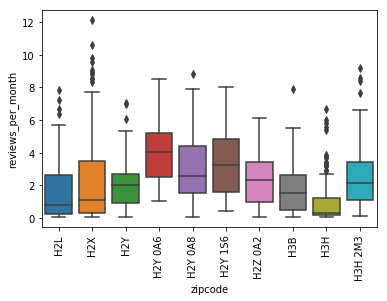

In [19]:
grouped_list_df = list_df.groupby('zipcode')['reviews_per_month'].sum().sort_values(ascending=False).reset_index()
grouped_list_df = grouped_list_df.head(10)
grouped_list_df = grouped_list_df.sort_values(by=['zipcode'])

sns.barplot(data=grouped_list_df, x='zipcode', y='reviews_per_month')
plt.xticks(rotation='vertical')
plt.show()

sub_list_df = list_df.loc[list_df['zipcode'].isin(grouped_list_df['zipcode'])]
sub_list_df = sub_list_df.sort_values(by=['zipcode'])
sns.boxplot(data=sub_list_df, x='zipcode', y='reviews_per_month')
plt.xticks(rotation='vertical')
plt.show()

In this case, boxplot will play a major role. In barplot, it looks 'H2Y 0A8' has highest score, but in boxplot 'H2X' has some reviews having high scores. 'H2Y 0A8' has high number of good reviews. For (H2Y 0A6, H2Y 1S6), they have good number of good reviews. 

### Insights based of number of superhost

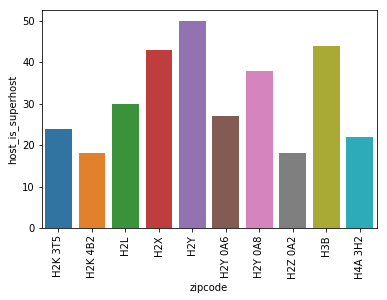

In [20]:
new_list_df = list_df.loc[list_df['host_is_superhost'] == 't']
grouped_list_df = new_list_df.groupby('zipcode')['host_is_superhost'].count().sort_values(ascending=False).reset_index()
grouped_list_df = grouped_list_df.head(10)
grouped_list_df = grouped_list_df.sort_values(by=['zipcode'])

sns.barplot(data=grouped_list_df, x='zipcode', y='host_is_superhost')
plt.xticks(rotation='vertical')
plt.show()

From above plot, we can say that (H2Y, H3B, H2X, H2Y 0A8, H2L) area have high number of superhost.

Overall, we cay that (H2X, H2Y 0A8, H3B) are some of the zipcode areas where anyone can find best rooms based on customer reviews and superhost availability.

### Is there any similar type of listing available?

### Reading dataset

In [21]:
list_df = pd.read_csv('./dataset/listings.csv')
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20190311061246,2019-03-11,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Centrally located clean comfy furnished room ...,Centrally located in trendy Le Plateau. Join...,none,Although my place is centrally located in Le P...,...,t,f,flexible,f,f,1,0,1,0,2.68
1,2843,https://www.airbnb.com/rooms/2843,20190311061246,2019-03-11,Fabulous downtown room,Come stay in this trendy area of downtown Mont...,"Private individual room, double bed, desk, goo...",Come stay in this trendy area of downtown Mont...,none,This area of St Henri is actually downtown Mon...,...,t,f,moderate,f,f,6,3,3,0,0.96
2,14584,https://www.airbnb.com/rooms/14584,20190311061246,2019-03-11,"Spread Out in 1,200 Square Feet of Luxury in t...",This stylish and spacious loft has modern artw...,It's artistic and tasteful with a modern touch...,This stylish and spacious loft has modern artw...,none,This chic apartment can be found in the Platea...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.50
3,29059,https://www.airbnb.com/rooms/29059,20190311061246,2019-03-11,Lovely studio Quartier Latin,"Lovely studio with 1 closed room, near everyth...","Lovely studio with 1 closed room, near everyth...","Lovely studio with 1 closed room, near everyth...",none,CENTRAL est le mot d'ordre : tout est proche. ...,...,f,f,moderate,f,f,2,2,0,0,2.57
4,29061,https://www.airbnb.com/rooms/29061,20190311061246,2019-03-11,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...,Lovely historic house with plenty of period ch...,Charmante maison au coeur du Quartier Latin et...,none,Le quartier que vous découvrirez se nomme le Q...,...,t,f,moderate,f,f,2,2,0,0,0.52


### Changing data type of attributes
Here, I will only use 'name' and 'description' attribute for the feature extraction. I will use TfidfVectorizer which will compute the bag of word count and tfidf values.

In [22]:
new_df = list_df[['id', 'name', 'description']]

# storing the name attribute as str dtype
list_df['name'] = list_df['name'].astype('str')
list_df['description'] = list_df['description'].astype('str')

new_df.head()

,id,name,description
0,2078,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...
1,2843,Fabulous downtown room,Come stay in this trendy area of downtown Mont...
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t...",This stylish and spacious loft has modern artw...
3,29059,Lovely studio Quartier Latin,"Lovely studio with 1 closed room, near everyth..."
4,29061,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...


### Checking for any null values

In [23]:
new_df.isnull().sum()

id               0
name            19
description    354
dtype: int64

### Combining the name and description attribute

In [24]:
new_df['content'] = new_df[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

# dropping name and description attribute
new_df = new_df.drop(['name', 'description'], axis=1)

new_df.head()

/home/rajat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,content
0,2078,Central comfy close to Metro Laurie // Central...
1,2843,Fabulous downtown room // Come stay in this tr...
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t..."
3,29059,Lovely studio Quartier Latin // Lovely studio ...
4,29061,Maison historique - Quartier Latin // Charmant...


### Creating matrix of Tf-idf features

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf_matrix = tf.fit_transform(new_df['content'])

### Calculating the similarity of documents using tf_matrix

In [26]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(tf_matrix, tf_matrix)

### Creating dictionary storing the similarity measures for each listing.

In [27]:
results = {}
for idx, row in new_df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], new_df['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]
    
results

### Function for recommending similar listing

In [29]:
def item(id):
    name   = new_df.loc[new_df['id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + new_df.loc[new_df['id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')

In [30]:
recommend(item_id = 29061, num = 5)

Recommending 5 products similar to Maison historique - Quartier Latin 
Description: Charmante maison au coeur du Quartier Latin et proche de toutes les activités touristiques. Cette maison vous charmera par son caractère historique, elle fait partie...
---

Recommended: Maison de ville dans le Sud ouest de Montréal 
Description: Belle maison ancestrale chaleureuse au coeur de Montréal dans le Sud ouest. Quartier paisible avec beaucoup d'arbres. À proximité du canal Lachine, du marché Atwater...
(score:0.3188891065189876)

Recommended: maison en ville avec jardin 
Description: C'est une maison pleine de charme, comportant un rez-de-chaussée  avec sous-sol, agrémentée d'un jardin très ensoleillé où il fait bon relaxer au son du jet d'eau et...
(score:0.31623196743062615)

Recommended: cosy house- heart of Montreal- family friendly 
Description: Gorgeous house in the heart of Montreal: Free private parking, view, AC, Wifi, in a quiet residential area with a large sunny backyard. A real pe